#### Objective:
##### Understanding the driving factors or variables which are strong indicators of the loan defaulters.

#### Importing libraries

In [3]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing data from CSV and removing the null columns

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Reading Loan.csv file.
df_loan = pd.read_csv("loan.csv")
df_loan.head()

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\597024963.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
# Removing columns which contain only null values.
df_loan = df_loan.dropna(axis = 1, how = 'all')

In [8]:
# Removing the records for the customers with the Loan Status as 'Current'.
df_loan= df_loan[df_loan['loan_status']!='Current']
df_loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

#### Handling missing data

In [10]:
# Checking the column informations.
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  38577 no

In [11]:
# Checking distinct values in each column.
df_loan.nunique()

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
desc                          25802
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths              

In [12]:
# Removing columns with high amount of missing values.
df_loan=df_loan.drop(["mths_since_last_delinq","mths_since_last_record","next_pymnt_d"],axis=1)

In [13]:
# Identifying columns which will be used in the analysis.
# We are ignoring the behavioural columns and the columns which have only 1 unique value.
df_loan_fin = df_loan[['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','emp_length','home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies']]
df_loan_fin.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [14]:
df_loan_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [15]:
# Identify percentage of missing values.
100*df_loan_fin.isnull().sum()/df_loan.shape[0]

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [16]:
# Remove rows with null values for columns 'emp_length' and 'pub_rec_bankruptcies'
df_loan_fin = df_loan_fin[df_loan_fin['emp_length'].notna()]
df_loan_fin = df_loan_fin[df_loan_fin['pub_rec_bankruptcies'].notna()]

In [17]:
# Converting the 'int_rate' column from string to float
df_loan_fin['int_rate'] = df_loan_fin['int_rate'].str.rstrip('%').astype('float')

In [18]:
# Converting the 'pub_rec_bankruptcies' column from float to integer
df_loan_fin['pub_rec_bankruptcies'] = df_loan_fin['pub_rec_bankruptcies'].apply(np.int64)
df_loan_fin['pub_rec_bankruptcies'] = df_loan_fin['pub_rec_bankruptcies'].apply(str)

In [19]:
df_loan_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36847 non-null  int64  
 1   loan_amnt             36847 non-null  int64  
 2   funded_amnt           36847 non-null  int64  
 3   funded_amnt_inv       36847 non-null  float64
 4   term                  36847 non-null  object 
 5   int_rate              36847 non-null  float64
 6   installment           36847 non-null  float64
 7   grade                 36847 non-null  object 
 8   emp_length            36847 non-null  object 
 9   home_ownership        36847 non-null  object 
 10  annual_inc            36847 non-null  float64
 11  verification_status   36847 non-null  object 
 12  issue_d               36847 non-null  object 
 13  loan_status           36847 non-null  object 
 14  purpose               36847 non-null  object 
 15  addr_state            36

In [20]:
# Creating Month and Year columns from the issue date
df_loan_fin['issue_d'] = pd.to_datetime(df_loan_fin['issue_d'], format='%b-%y')
df_loan_fin['issue_month'] = df_loan_fin['issue_d'].dt.month
df_loan_fin['issue_year'] = df_loan_fin['issue_d'].dt.year

In [21]:
df_loan_fin['issue_month'] = pd.to_datetime(df_loan_fin['issue_d'], format='%m').dt.month_name().str.slice(stop=3)

#### Creating categorical columns for Loan Amount, Interest Rate and Annual Income

In [23]:
# Identifying quariles for the Loan Amount
df_loan_fin["loan_amnt"].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [24]:
# Creating a categorical column based on the Loan Amount
def loan_amnt_cat(val):
    if val <= 5000:
        return '0 - 5K'
    elif (val > 5000) and (val <= 10000):
        return '5K - 10K'
    elif (val > 10000) and (val <= 15000):
        return '10K - 15K'
    else:
        return '15K - above'

df_loan_fin['loan_amnt_cat'] = df_loan_fin.apply(lambda x : loan_amnt_cat(x['loan_amnt']), axis = 1)

In [25]:
# Identifying quariles for the Interest Rate
df_loan_fin["int_rate"].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [26]:
# Creating a categorical column based on the Interest Rate
def int_rate_cat(val):
    if val <= 9:
        return 'Low'
    elif (val > 9) and (val <= 12):
        return 'Moderate'
    elif (val > 12) and (val <= 15):
        return 'High'
    else:
        return 'Very High'

df_loan_fin['int_rate_cat'] = df_loan_fin.apply(lambda x : int_rate_cat(x['int_rate']), axis = 1)

In [27]:
# Identifying quariles for the Annual Income
df_loan_fin["annual_inc"].describe()

count    3.684700e+04
mean     6.940448e+04
std      6.402747e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: >

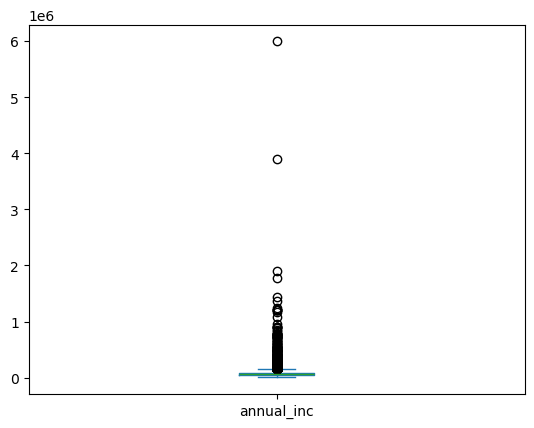

In [28]:
# Creating a box plot to check the outliers for Annual Income
df_loan_fin['annual_inc'].plot(kind='box')

In [29]:
# Since there are very high outliers for the Annual Income, we will be removing those records.
Q1 = df_loan_fin['annual_inc'].quantile(0.25)
Q3 = df_loan_fin['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_loan_fin = df_loan_fin[(df_loan_fin['annual_inc'] >= lower_bound) & (df_loan_fin['annual_inc'] <= upper_bound)]
df_loan_fin["annual_inc"].describe()

count     35144.000000
mean      61833.815031
std       28152.710107
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78996.000000
max      145992.000000
Name: annual_inc, dtype: float64

In [30]:
# Creating a categorical column based on the Annual Income
def annual_inc_cat(val):
    if val <= 40000:
        return '0 - 40K'
    elif (val > 40000) and (val <= 60000):
        return '40K - 60K'
    elif (val > 60000) and (val <= 80000):
        return '60K - 80K'
    else:
        return '80K - above'

df_loan_fin['annual_inc_cat'] = df_loan_fin.apply(lambda x : annual_inc_cat(x['annual_inc']), axis = 1)

In [31]:
df_loan_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35144 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    35144 non-null  int64         
 1   loan_amnt             35144 non-null  int64         
 2   funded_amnt           35144 non-null  int64         
 3   funded_amnt_inv       35144 non-null  float64       
 4   term                  35144 non-null  object        
 5   int_rate              35144 non-null  float64       
 6   installment           35144 non-null  float64       
 7   grade                 35144 non-null  object        
 8   emp_length            35144 non-null  object        
 9   home_ownership        35144 non-null  object        
 10  annual_inc            35144 non-null  float64       
 11  verification_status   35144 non-null  object        
 12  issue_d               35144 non-null  datetime64[ns]
 13  loan_status          

#### Segmentation of columns

In [33]:
# Identifying the numerical and categorical columns
num_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti']
cat_cols = ['term','grade','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state','issue_year','loan_amnt_cat','int_rate_cat','annual_inc_cat','pub_rec_bankruptcies']
df_loan_fin.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_cat,int_rate_cat,annual_inc_cat
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,Dec,2011,0 - 5K,Moderate,0 - 40K
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,Dec,2011,0 - 5K,Very High,0 - 40K
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,Dec,2011,0 - 5K,Very High,0 - 40K
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,Dec,2011,5K - 10K,High,40K - 60K
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,Dec,2011,0 - 5K,Low,0 - 40K


In [34]:
df_loan_fin.columns[0]

'id'

In [35]:
# Creating a dataframe with only the defaulters
df_loan_default = df_loan_fin[df_loan_fin['loan_status'] == 'Charged Off']

#### User Defined Functions

In [37]:
# Function for creating the two plots for numerical columns
def num_twin_plot(df, column, label):
    fig, p = plt.subplots(1,2, figsize=(16, 5))
    sns.histplot(data = df, x = column, ax = p[0]).set(title='Distribution of Customers depending on ' + label)
    sns.boxplot(data = df, x = 'loan_status', y = column, ax = p[1]).set(title='Distribution of Customers depending on ' + label + ' and Loan Status')
    p[0].set_xlabel(label)
    p[1].set_xlabel('Loan Status')
    p[1].set_ylabel(label)
    plt.tight_layout()
    plt.show()

In [38]:
# Function for creating the two plots for categorical columns
def cat_twin_plot(df1, df2, column, label, sort_by):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.countplot(x = column, hue = column, 
                data = df1, legend=False,
                order = df1[column].value_counts().index, 
                    ax = p[0]).set(title='Distribution of Defaulters depending on the ' + label)
    
    for x in p[0].patches:
        p[0].annotate(f'{x.get_height()}', (x.get_x() + x.get_width() / 2., x.get_height()),
                         ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 1),
                         textcoords='offset points')

    df_result = df2[df2['loan_status']=='Charged Off']
    df_result = df_result[[column,'Percent']].sort_values(by=[sort_by], ascending=False)

    sns.barplot(x = column, y = 'Percent', hue = column, 
                data = df_result, legend=False, ax = p[1]).set(title='Percentage distribution depending on the ' + label)
    
    for x in p[1].patches:
        p[1].annotate(f'{x.get_height()}', (x.get_x() + x.get_width() / 2., x.get_height()),
                         ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 1),
                         textcoords='offset points')
    
    p[0].set_xlabel(label)
    p[0].set_ylabel('Count of Defaulters')
    p[1].set_xlabel(label)
    p[1].set_ylabel('Percentage of Defaulters')
    plt.show()

### Numerical Data Analysis

#### Univariate analysis on the Loan Amount

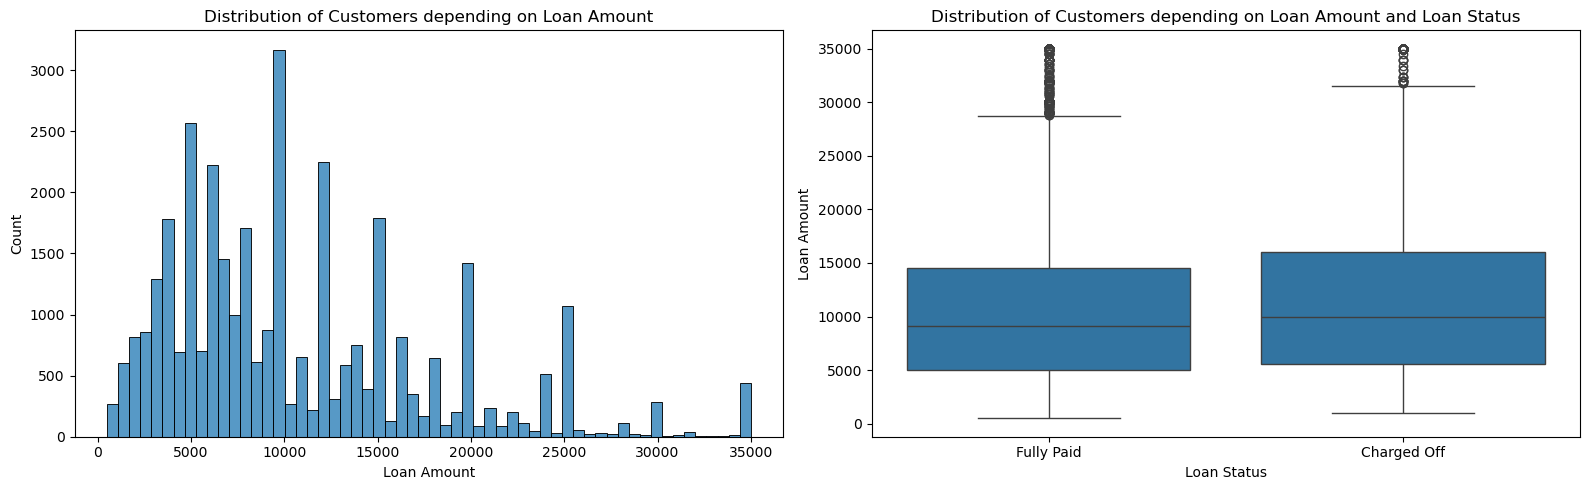

In [41]:
num_twin_plot(df_loan_fin, 'loan_amnt', 'Loan Amount')

In [42]:
# Observations:
# 1. Most of the loan amount applied was in the range of 5K - 15K.
# 2. For Defaulters, most of the loan amount applied was in the range of 6K - 16K

#### Univariate analysis on the Annual Income

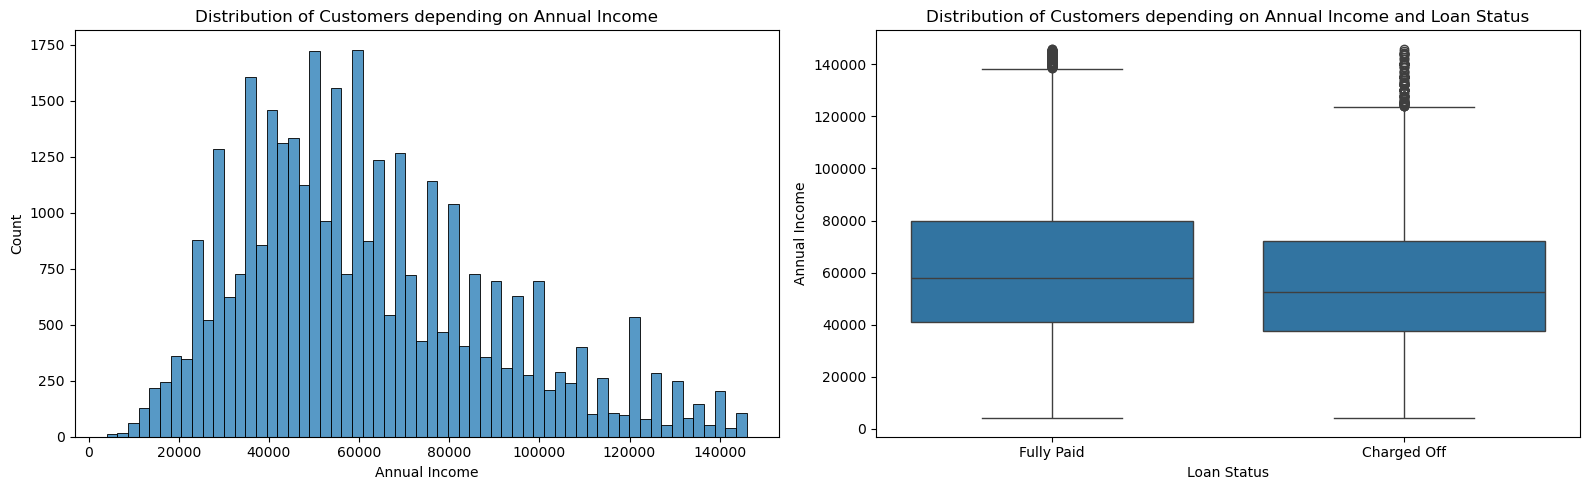

In [44]:
num_twin_plot(df_loan_fin, 'annual_inc', 'Annual Income')

In [45]:
# Observations:
# 1. The annual income of most applicants lies between 40K - 80K.
# 2. The annual income of most defaulters lies between 37K - 72K.

#### Univariate analysis on the Interest Rate

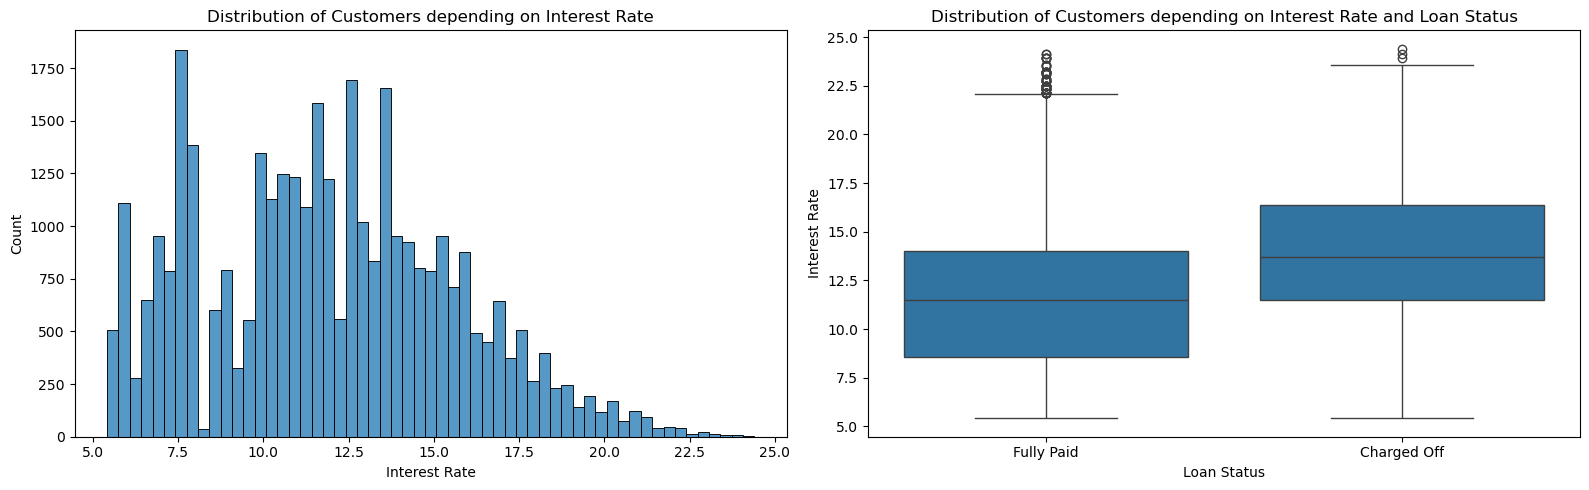

In [47]:
num_twin_plot(df_loan_fin, 'int_rate', 'Interest Rate')

In [48]:
# Observations:
# 1. The rate of interest for most applicants lies between 9% - 14.5%.
# 2. The rate of interest for most defaulters lies between 11.5% - 16.5%.

#### Correlation analysis for numerical data

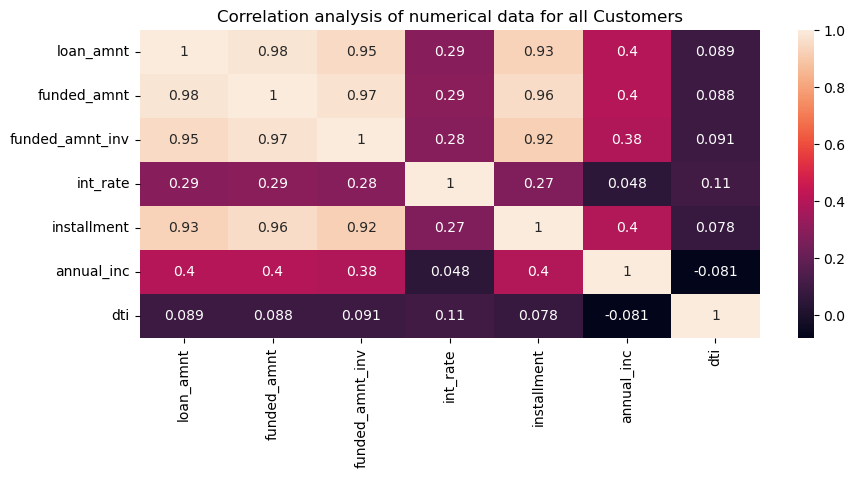

In [50]:
plt.figure(figsize=(10, 4))
sns.heatmap(df_loan_fin[num_cols].corr(),annot=True)
plt.title('Correlation analysis of numerical data for all Customers')
plt.show()

In [51]:
# Observations:
# 1. There is an excellent correlation between the loan amount, the funded amount and the funded amount by investors.
# 2. There is a moderate correlation between the loan amount and annual income.
# 3. There is a weak correlation between the loan amount and rate of interest.
# 4. There is hardly any correlation of the DTI with the other attributes.

### Categorical Data Analysis

#### Analysis based on Loan Status

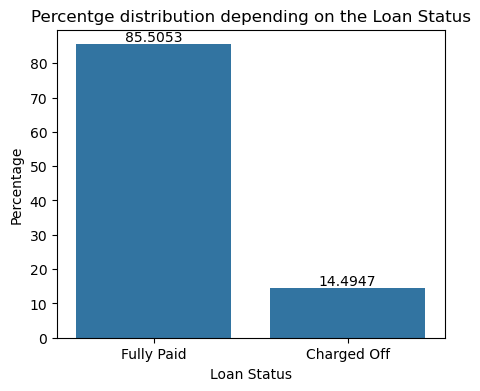

In [54]:
# Chart on percentage of defaulters and non-defaulters
plt.figure(figsize=(5, 4))
ax = sns.countplot(x=df_loan_fin["loan_status"],stat = 'percent')
plt.title('Percentge distribution depending on the Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
ax.bar_label(ax.containers[0])
plt.show()

In [55]:
# Observations:
# 1. About 14.5% of the total applicants end up becoming defaulters.

#### Analysis based on the Loan Amount

In [57]:
# Calculating distribution percentage based on Loan Amount Categories
df_loan_lnamt = df_loan_fin.groupby(['loan_status','loan_amnt_cat'])['loan_status'].count().reset_index(name='Count').sort_values(['loan_status','loan_amnt_cat'], ascending=False)
df_lnamt = df_loan_lnamt.groupby(['loan_amnt_cat'])['Count'].sum().reset_index(name='Total')
df_loan_lnamt = df_loan_lnamt.join(df_lnamt.set_index('loan_amnt_cat'), on='loan_amnt_cat')
df_loan_lnamt['Percent'] = (df_loan_lnamt['Count']/df_loan_lnamt['Total']*100).round(2)


In [58]:
# Creating pivot table for displaying the percentage difference based on 'loan_amnt_cat'
pd.pivot_table(df_loan_lnamt, values =['Percent','Count'], index =['loan_amnt_cat'], 
                         columns =['loan_status'], aggfunc = np.sum)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\1895897354.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_lnamt, values =['Percent','Count'], index =['loan_amnt_cat'],


Count                Percent           
loan_status   Charged Off Fully Paid Charged Off Fully Paid
loan_amnt_cat                                              
0 - 5K               1182       7551       13.53      86.47
10K - 15K             972       6145       13.66      86.34
15K - above          1426       5983       19.25      80.75
5K - 10K             1514      10371       12.74      87.26

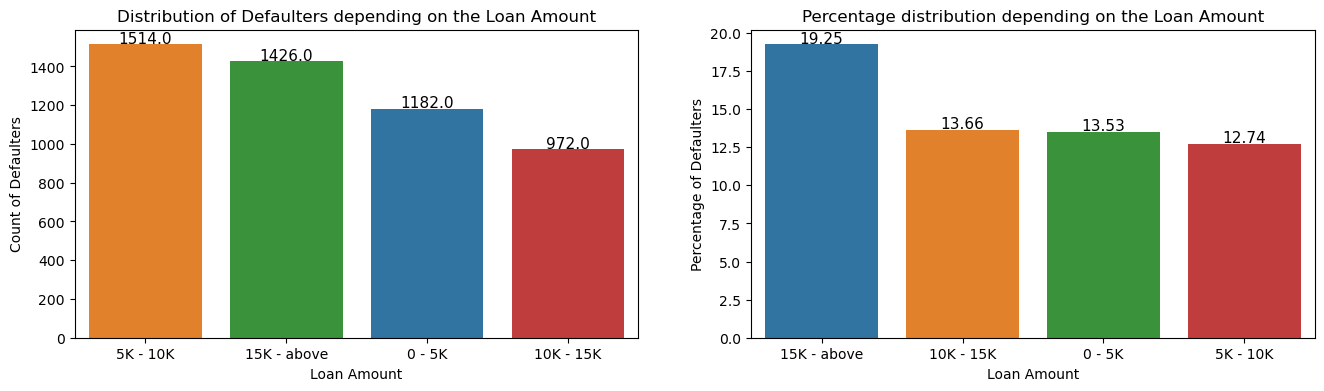

In [59]:
cat_twin_plot(df_loan_default, df_loan_lnamt, 'loan_amnt_cat', 'Loan Amount', 'Percent')

In [60]:
# Observations:
# 1. For loan amount, the most number of defaulters fall under the range of 5K-15K and the least under 10K-15K.
# 2. Looking at the proportion, the highest is for the range 15K-Above and the lowest is for 5K-10K. 

#### Analysis based on the Annual Income

In [62]:
# Calculating distribution percentage based on Annual Income
df_loan_annual = df_loan_fin.groupby(['loan_status','annual_inc_cat'])['loan_status'].count().reset_index(name='Count').sort_values(['loan_status','annual_inc_cat'], ascending=False)
df_annual = df_loan_annual.groupby(['annual_inc_cat'])['Count'].sum().reset_index(name='Total')
df_loan_annual = df_loan_annual.join(df_annual.set_index('annual_inc_cat'), on='annual_inc_cat')
df_loan_annual['Percent'] = (df_loan_annual['Count']/df_loan_annual['Total']*100).round(2)


In [63]:
# Creating pivot table for displaying the percentage difference based on 'emp_length'
pd.pivot_table(df_loan_annual, values =['Percent','Count'], index =['annual_inc_cat'], 
                         columns =['loan_status'], aggfunc = np.sum)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\333225454.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_annual, values =['Percent','Count'], index =['annual_inc_cat'],


Count                Percent           
loan_status    Charged Off Fully Paid Charged Off Fully Paid
annual_inc_cat                                              
0 - 40K               1577       7337       17.69      82.31
40K - 60K             1651       9176       15.25      84.75
60K - 80K              973       6402       13.19      86.81
80K - above            893       7135       11.12      88.88

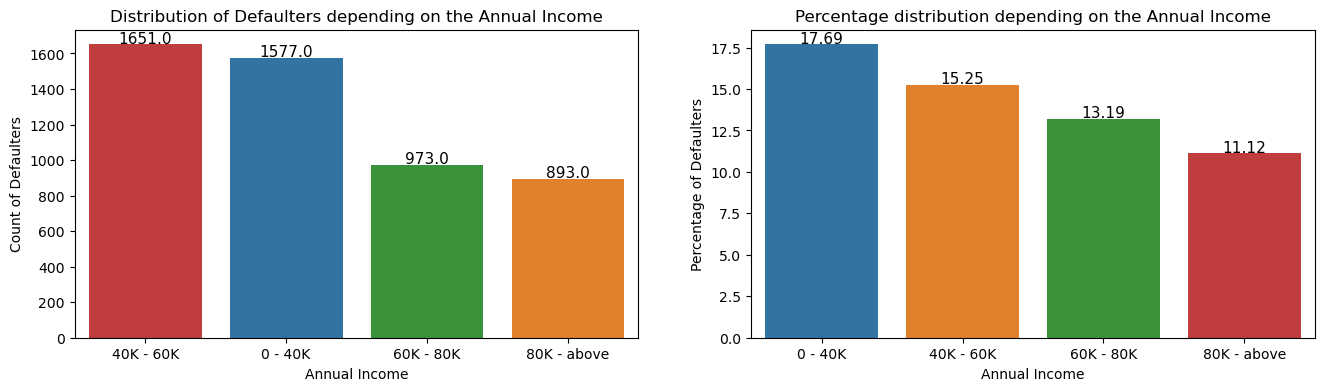

In [64]:
cat_twin_plot(df_loan_default, df_loan_annual, 'annual_inc_cat', 'Annual Income', 'Percent')

In [65]:
# Observations:
# 1. For annual income, the most number of defaulters fall under the range of 40K-60K and the least under 80K-Above.
# 2. Looking at the proportion, the highest is for the range 0-40K and the lowest is for 80K-Above. 

#### Analysis based on the Interest Rate

In [67]:
# Calculating distribution percentage based on Interest Rate
df_loan_intr = df_loan_fin.groupby(['loan_status','int_rate_cat'])['loan_status'].count().reset_index(name='Count').sort_values(['loan_status','int_rate_cat'], ascending=False)
df_intr = df_loan_intr.groupby(['int_rate_cat'])['Count'].sum().reset_index(name='Total')
df_loan_intr = df_loan_intr.join(df_intr.set_index('int_rate_cat'), on='int_rate_cat')
df_loan_intr['Percent'] = (df_loan_intr['Count']/df_loan_intr['Total']*100).round(2)


In [68]:
# Creating pivot table for displaying the percentage difference based on 'Interest Rate'
pd.pivot_table(df_loan_intr, values =['Percent','Count'], index =['int_rate_cat'], 
                         columns =['loan_status'], aggfunc = np.sum)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\102661231.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_intr, values =['Percent','Count'], index =['int_rate_cat'],


Count                Percent           
loan_status  Charged Off Fully Paid Charged Off Fully Paid
int_rate_cat                                              
High                1495       7672       16.31      83.69
Low                  524       8398        5.87      94.13
Moderate            1153       8590       11.83      88.17
Very High           1922       5390       26.29      73.71

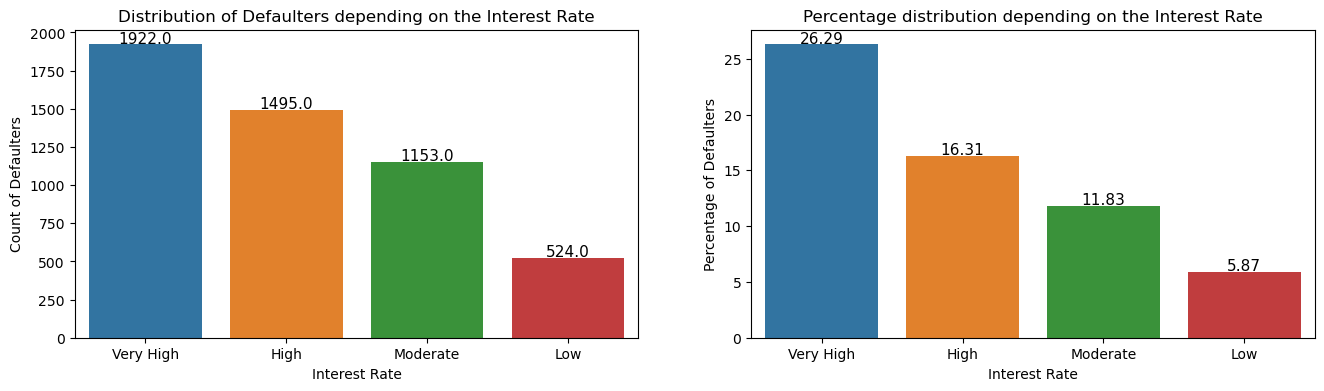

In [69]:
cat_twin_plot(df_loan_default, df_loan_intr, 'int_rate_cat', 'Interest Rate', 'Percent')

In [70]:
# Observations:
# 1. For rate of interest, the most number of defaulters fall under the category 'Very High' and the least under 'Low'.
# 2. Looking at the proportion, the highest is for the category 'Very High' and the lowest is for 'Low'. 

#### Analysis based on the Employement Period

In [72]:
# Calculating distribution percentage based on Employment Period
df_loan_emp = df_loan_fin.groupby(['loan_status','emp_length'])['loan_status'].count().reset_index(name='Count').sort_values(['loan_status','emp_length'], ascending=False)
df_emp_period = df_loan_emp.groupby(['emp_length'])['Count'].sum().reset_index(name='Total')
df_loan_emp = df_loan_emp.join(df_emp_period.set_index('emp_length'), on='emp_length')
df_loan_emp['Percent'] = (df_loan_emp['Count']/df_loan_emp['Total']*100).round(2)
df_loan_emp.head()

,loan_status,emp_length,Count,Total,Percent
21,Fully Paid,< 1 year,3600,4192,85.88
20,Fully Paid,9 years,995,1144,86.98
19,Fully Paid,8 years,1134,1325,85.58
18,Fully Paid,7 years,1378,1625,84.80
17,Fully Paid,6 years,1759,2050,85.80


In [73]:
# Creating pivot table for displaying the percentage difference based on 'emp_length'
pd.pivot_table(df_loan_emp, values =['Percent','Count'], index =['emp_length'], 
                         columns =['loan_status'], aggfunc = np.sum)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\4221111526.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_emp, values =['Percent','Count'], index =['emp_length'],


Count                Percent           
loan_status Charged Off Fully Paid Charged Off Fully Paid
emp_length                                               
1 year              436       2532       14.69      85.31
10+ years          1250       6572       15.98      84.02
2 years             537       3505       13.29      86.71
3 years             531       3251       14.04      85.96
4 years             433       2737       13.66      86.34
5 years             437       2587       14.45      85.55
6 years             291       1759       14.20      85.80
7 years             247       1378       15.20      84.80
8 years             191       1134       14.42      85.58
9 years             149        995       13.02      86.98
< 1 year            592       3600       14.12      85.88

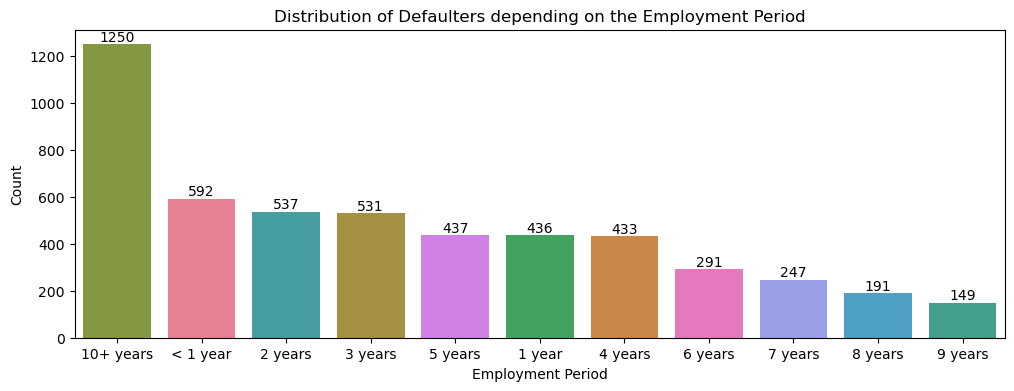

In [74]:
# Count of Defaulters based on Employment Period
plt.figure(figsize=(12, 4))
ax = sns.countplot(x = 'emp_length', hue = "emp_length", data = df_loan_default, order = df_loan_default['emp_length'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Defaulters depending on the Employment Period')
plt.xlabel('Employment Period')
plt.ylabel('Count')
plt.show()

In [75]:
# Observations:
# 1. For the employment period, the most number of defaulters fall under the category '10+ Years' and the least under '9 Years'.

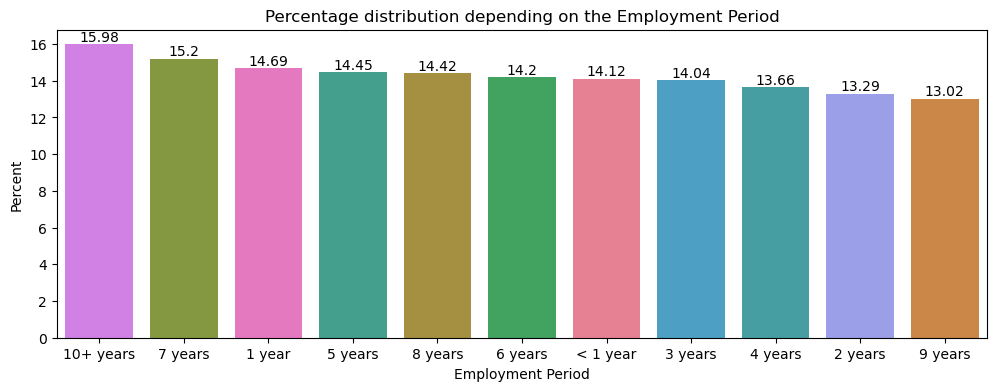

In [76]:
# Percentage distribution depending on the Employment Period
plt.figure(figsize=(12, 4))
ax = sns.barplot(x = 'emp_length', y = 'Percent', hue = 'emp_length', 
                 data = df_loan_emp[df_loan_emp['loan_status']=='Charged Off'], 
                 order = df_loan_emp[df_loan_emp['loan_status']=='Charged Off'].sort_values('Percent',ascending = False).emp_length)
plt.xlabel('Employment Period')
plt.ylabel('Percent')
plt.title('Percentage distribution depending on the Employment Period')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [77]:
# Observations:
# 1. Looking at the proportion, the highest is for the category '10+ Years' and the lowest is for '9 Years'.
# 2. There is not a high variation in the proportion for the different categories under employment period.

#### Analysis based on the Home Ownership

In [79]:
# Calculating distribution percentage based on Home Ownership
df_loan_home = df_loan_fin.groupby(['loan_status','home_ownership'])['loan_status'].count().reset_index(name='Count').sort_values(['loan_status','home_ownership'], ascending=False)
df_home = df_loan_home.groupby(['home_ownership'])['Count'].sum().reset_index(name='Total')
df_loan_home = df_loan_home.join(df_home.set_index('home_ownership'), on='home_ownership')
df_loan_home['Percent'] = (df_loan_home['Count']/df_loan_home['Total']*100).round(2)


In [80]:
# Creating pivot table for displaying the percentage difference based on 'home_ownership'
pd.pivot_table(df_loan_home, values =['Percent','Count'], index =['home_ownership'], 
                         columns =['loan_status'], aggfunc = np.sum)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\3816354327.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_home, values =['Percent','Count'], index =['home_ownership'],


Count                Percent           
loan_status    Charged Off Fully Paid Charged Off Fully Paid
home_ownership                                              
MORTGAGE              2082      13077       13.73      86.27
OTHER                   17         76       18.28      81.72
OWN                    382       2216       14.70      85.30
RENT                  2613      14681       15.11      84.89

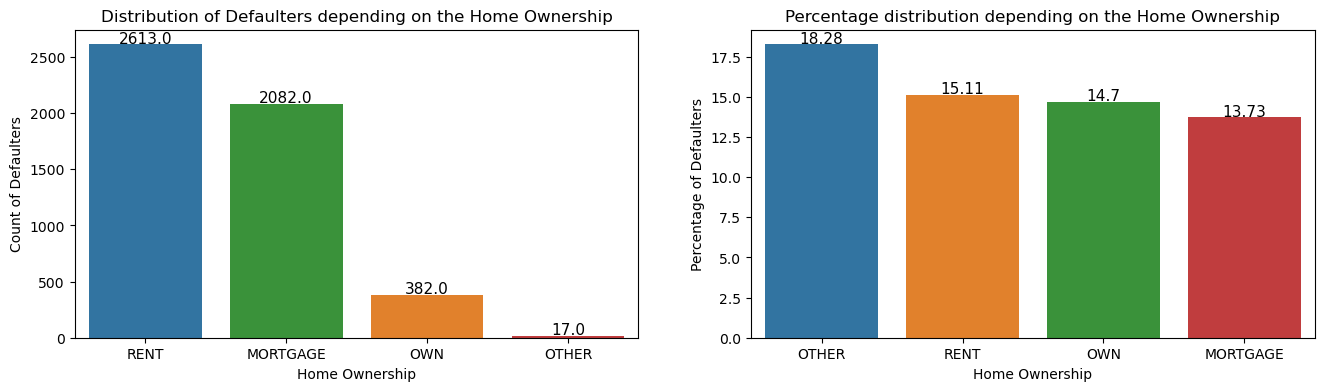

In [81]:
cat_twin_plot(df_loan_default, df_loan_home, 'home_ownership', 'Home Ownership', 'Percent')

In [82]:
# Observations:
# 1. For home ownership, the most number of defaulters fall under the category 'Rent' and the least under 'Other'.
# 2. Looking at the proportion, the highest is for the category 'Other' and the lowest is for 'Mortgage'.
# 3. There is a high proportion for the category 'Other', but the number of defaulters in it is very low compared to the other categories.

#### Analysis based on the Year Issued

In [84]:
# Calculating distribution percentage based on Year Issued
df_loan_year = df_loan_fin.groupby(['loan_status','issue_year'])['loan_status'].count().reset_index(name='Count').sort_values(['loan_status','issue_year'], ascending=False)
df_year = df_loan_year.groupby(['issue_year'])['Count'].sum().reset_index(name='Total')
df_loan_year = df_loan_year.join(df_year.set_index('issue_year'), on='issue_year')
df_loan_year['Percent'] = (df_loan_year['Count']/df_loan_year['Total']*100).round(2)


In [85]:
# Creating pivot table for displaying the percentage difference based on 'issue_year'
pd.pivot_table(df_loan_year, values =['Percent', 'Count'], index =['issue_year'], 
                         columns =['loan_status'], aggfunc = np.sum)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\680929187.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_year, values =['Percent', 'Count'], index =['issue_year'],


Count                Percent           
loan_status Charged Off Fully Paid Charged Off Fully Paid
issue_year                                               
2007                  2          5       28.57      71.43
2008                166        895       15.65      84.35
2009                567       3929       12.61      87.39
2010               1359       9387       12.65      87.35
2011               3000      15834       15.93      84.07

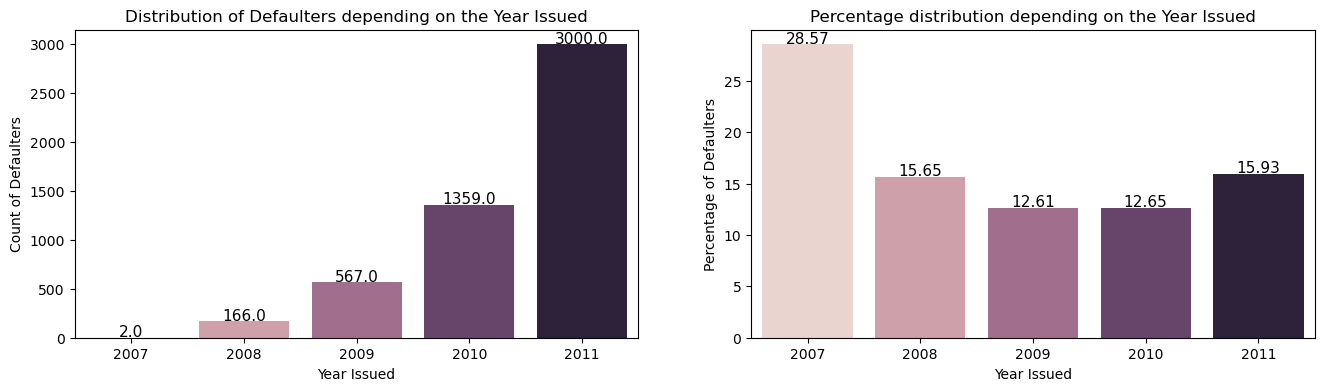

In [86]:
# Count of Defaulters based on Year Issued
fig, p = plt.subplots(1,2, figsize=(16, 4))
ax = sns.countplot(x = 'issue_year', hue = "issue_year", data = df_loan_default, legend=False,
            ax = p[0]).set(title='Distribution of Defaulters depending on the Year Issued')

for x in p[0].patches:
    p[0].annotate(f'{x.get_height()}', (x.get_x() + x.get_width() / 2., x.get_height()),
                     ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 1),
                     textcoords='offset points')

sns.barplot(x ='issue_year', y = 'Percent', hue = "issue_year", 
            data = df_loan_year[df_loan_year['loan_status']=='Charged Off'], legend=False, 
            ax = p[1]).set(title='Percentage distribution depending on the Year Issued')

for x in p[1].patches:
    p[1].annotate(f'{x.get_height()}', (x.get_x() + x.get_width() / 2., x.get_height()),
                     ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 1),
                     textcoords='offset points')

p[0].set_xlabel('Year Issued')
p[0].set_ylabel('Count of Defaulters')
p[1].set_xlabel('Year Issued')
p[1].set_ylabel('Percentage of Defaulters')
plt.show()


In [87]:
# Observations:
# 1. For year of issue, the most number of defaulters fall under the year 2011 and the least under 2007.
# 2. Looking at the proportion, the highest is for the year 2007 and the lowest is for 2009.
# 3. There is a high proportion for the year 2007, but the number of defaulters in it is very low.
# 4. There was gradual decrease in the proportion over the years from 2007-2010, but then there wan an increase in the year 2011.

#### Analysis based on the Purpose of Loan

In [89]:
# Calculating distribution percentage based on Purpose
df_loan_purpose = df_loan_fin.groupby(['loan_status','purpose'])['loan_status'].count().reset_index(name='Count').sort_values(['loan_status','purpose'], ascending=False)
df_purpose = df_loan_purpose.groupby(['purpose'])['Count'].sum().reset_index(name='Total')
df_loan_purpose = df_loan_purpose.join(df_purpose.set_index('purpose'), on='purpose')
df_loan_purpose['Percent'] = (df_loan_purpose['Count']/df_loan_purpose['Total']*100).round(2)


In [90]:
# Creating pivot table for displaying the percentage difference based on 'purpose'
pd.pivot_table(df_loan_purpose, values =['Percent', 'Count'], index =['purpose'], 
                         columns =['loan_status'], aggfunc = np.sum)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\172947425.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_purpose, values =['Percent', 'Count'], index =['purpose'],


Count                Percent           
loan_status        Charged Off Fully Paid Charged Off Fully Paid
purpose                                                         
car                        151       1240       10.86      89.14
credit_card                484       4101       10.56      89.44
debt_consolidation        2547      14173       15.23      84.77
educational                 48        240       16.67      83.33
home_improvement           297       2161       12.08      87.92
house                       54        267       16.82      83.18
major_purchase             202       1763       10.28      89.72
medical                     98        515       15.99      84.01
moving                      79        439       15.25      84.75
other                      556       2904       16.07      83.93
renewable_energy            17         70       19.54      80.46
small_business             425       1114       27.62      72.38
vacation                    49        284       14.71      85.29
wedding                     87        779       10.05      89.95

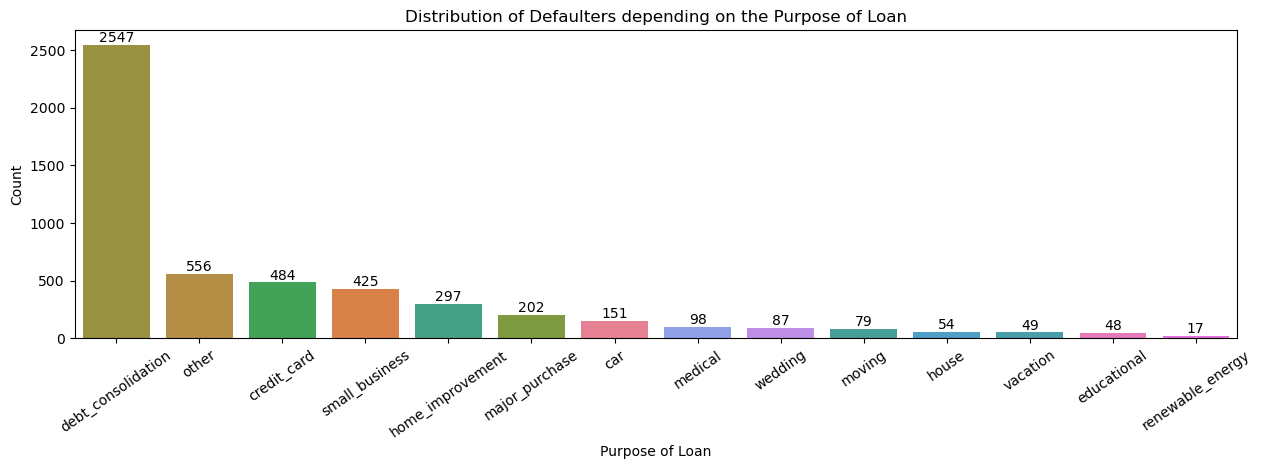

In [91]:
# Count of Defaulters based on Purpose
plt.figure(figsize=(15, 4))
ax = sns.countplot(x = 'purpose', hue = "purpose", data = df_loan_default, order = df_loan_default['purpose'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Defaulters depending on the Purpose of Loan')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.xticks(rotation=35)
plt.show()


In [92]:
# Observations:
# 1. For the purpose of loan, the most number of defaulters fall under the category 'Debt Consolidation' and the least under 'Renewable Energy'.

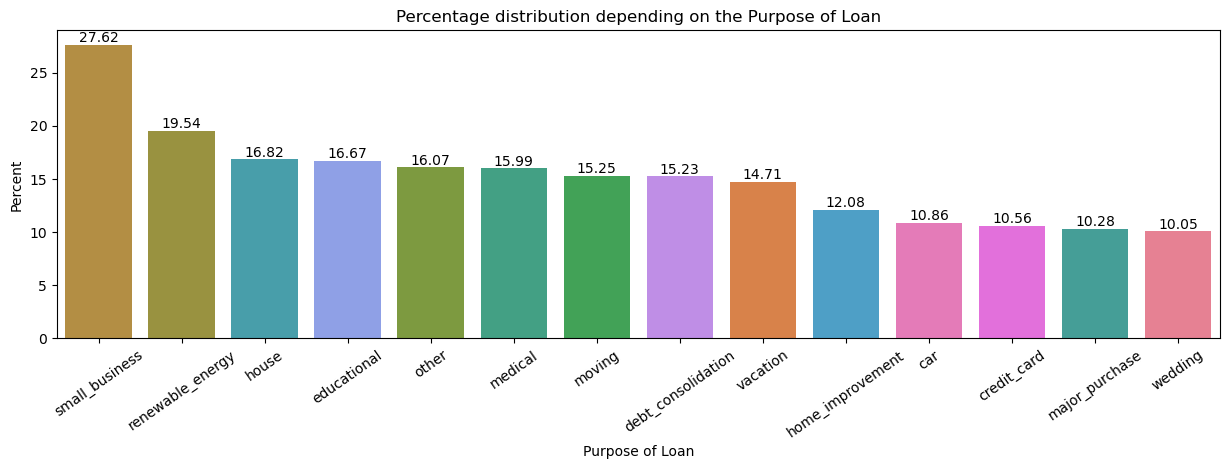

In [93]:
# Percentage distribution depending on the Purpose
plt.figure(figsize=(15, 4))
ax = sns.barplot(x ='purpose', y = 'Percent', hue = "purpose", 
                 data = df_loan_purpose[df_loan_purpose['loan_status']=='Charged Off'], 
                 order = df_loan_purpose[df_loan_purpose['loan_status']=='Charged Off'].sort_values('Percent',ascending = False).purpose)
plt.xlabel('Purpose of Loan')
plt.ylabel('Percent')
plt.title('Percentage distribution depending on the Purpose of Loan')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=35)
plt.show()

In [94]:
# Observations:
# 1. Looking at the proportion, the highest is for the category 'Small Business' and the lowest is for 'Wedding'.
# 2. 'Renewable Energy' has the second highest percentage, but it has the lowest number of defaulters.
# 3. 'Debt Consolidation', which has the highest number of defaulters, has an average proportion when compared to the others.

#### Analysis based on Grade

In [96]:
# Calculating distribution percentage based on Grade
df_loan_grade = df_loan_fin.groupby(['loan_status','grade'])['loan_status'].count().reset_index(name='Count').sort_values(['loan_status','grade'], ascending=False)
df_grade = df_loan_grade.groupby(['grade'])['Count'].sum().reset_index(name='Total')
df_loan_grade = df_loan_grade.join(df_grade.set_index('grade'), on='grade')
df_loan_grade['Percent'] = (df_loan_grade['Count']/df_loan_grade['Total']*100).round(2)

In [97]:
# Creating pivot table for displaying the percentage difference based on 'Grade'
pd.pivot_table(df_loan_grade, values =['Percent', 'Count'], index =['grade'], 
                         columns =['loan_status'], aggfunc = np.sum)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\1075115699.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_grade, values =['Percent', 'Count'], index =['grade'],


Count                Percent           
loan_status Charged Off Fully Paid Charged Off Fully Paid
grade                                                    
A                   544       8631        5.93      94.07
B                  1284       9363       12.06      87.94
C                  1234       5934       17.22      82.78
D                  1019       3625       21.94      78.06
E                   637       1749       26.70      73.30
F                   281        579       32.67      67.33
G                    95        169       35.98      64.02

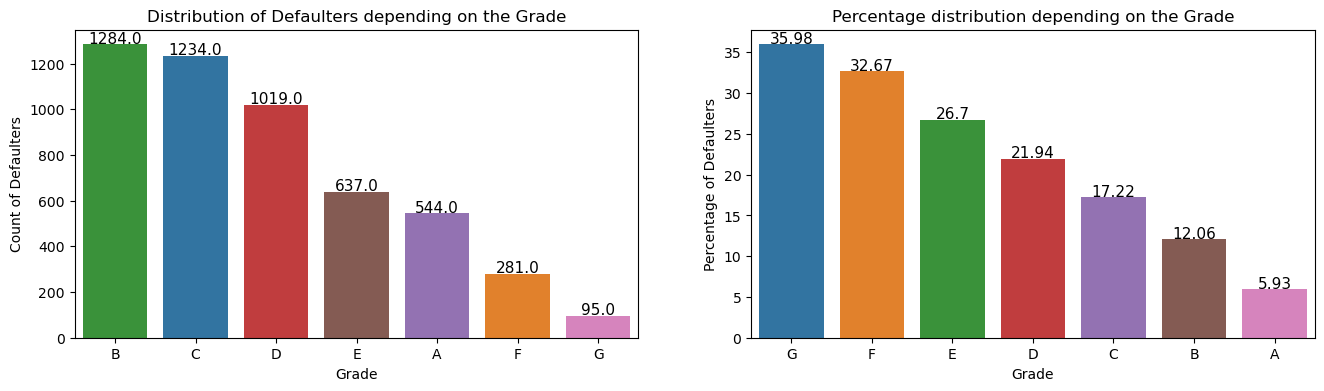

In [98]:
cat_twin_plot(df_loan_default, df_loan_grade, 'grade', 'Grade', 'Percent')

In [99]:
# Observations:
# 1. For the grade, the most number of defaulters fall under the category 'B' and the least under 'G'.
# 2. Looking at the proportion, the highest is for the category 'G' and the lowest is for 'A'.
# 3. If we ignore the category A, then there is reverse correlation between the proportion and the actual number of defaulters.

#### Analysis based on Term

In [101]:
# Calculating distribution percentage based on Term
df_loan_term = df_loan_fin.groupby(['loan_status','term'])['loan_status'].count().reset_index(name='Count').sort_values(['loan_status','term'], ascending=False)
df_term = df_loan_term.groupby(['term'])['Count'].sum().reset_index(name='Total')
df_loan_term = df_loan_term.join(df_term.set_index('term'), on='term')
df_loan_term['Percent'] = (df_loan_term['Count']/df_loan_term['Total']*100).round(2)

In [102]:
# Creating pivot table for displaying the percentage difference based on 'Term'
pd.pivot_table(df_loan_term, values =['Percent', 'Count'], index =['term'], 
                         columns =['loan_status'], aggfunc = np.sum)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\678312253.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_term, values =['Percent', 'Count'], index =['term'],


Count                Percent           
loan_status Charged Off Fully Paid Charged Off Fully Paid
term                                                     
36 months          2857      23528       10.83      89.17
60 months          2237       6522       25.54      74.46

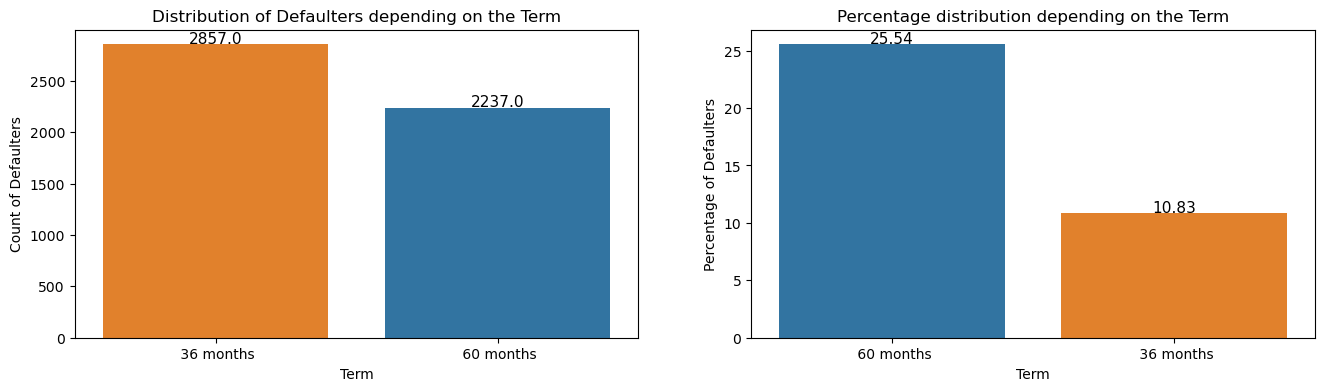

In [103]:
cat_twin_plot(df_loan_default, df_loan_term, 'term', 'Term', 'Percent')

In [104]:
# Observations:
# 1. For the term, the most number of defaulters fall under the category of '36 Months' and the least under '60 Months'.
# 2. Looking at the proportion, the highest is for the category '60 Months' and the lowest is for '36 Months'.
# 3. There is reverse correlation between the proportion and the actual number of defaulters.
# 4. Even though there is not a huge difference in the number of defaulters between the two categories, the proportion difference is high. 

#### Analysis based on Verification Status

In [106]:
# Calculating distribution percentage based on Verification Status
df_loan_verify = df_loan_fin.groupby(['loan_status','verification_status'])['loan_status'].count().reset_index(name='Count').sort_values(['loan_status','verification_status'], ascending=False)
df_verify = df_loan_verify.groupby(['verification_status'])['Count'].sum().reset_index(name='Total')
df_loan_verify = df_loan_verify.join(df_verify.set_index('verification_status'), on='verification_status')
df_loan_verify['Percent'] = (df_loan_verify['Count']/df_loan_verify['Total']*100).round(2)


In [107]:
# Creating pivot table for displaying the percentage difference based on 'Verification Status'
pd.pivot_table(df_loan_verify, values =['Percent', 'Count'], index =['verification_status'], 
                         columns =['loan_status'], aggfunc = np.sum).sort_values(by=[('Percent','Charged Off')],ascending=False)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\3818502918.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_verify, values =['Percent', 'Count'], index =['verification_status'],


Count                Percent           
loan_status         Charged Off Fully Paid Charged Off Fully Paid
verification_status                                              
Verified                   1862       9015       17.12      82.88
Source Verified            1338       7681       14.84      85.16
Not Verified               1894      13354       12.42      87.58

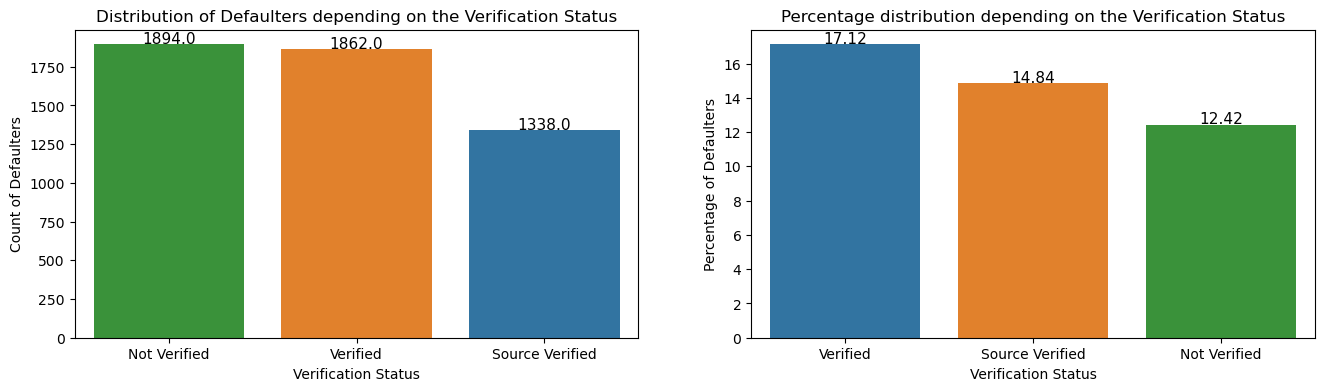

In [108]:
cat_twin_plot(df_loan_default, df_loan_verify, 'verification_status', 'Verification Status', 'Percent')

In [109]:
# Observations:
# 1. For the verification status, the most number of defaulters fall under the category of 'Not Verified' and the least under 'Source Verified'.
# 2. Looking at the proportion, the highest is for the category 'Verified' and the lowest is for 'Not Verified'.
# 3. Even though there is hardly any difference in the number of defaulters between the two categories 'Verified' and 'Not Verified',
#    the proportion difference is high. 

#### Analysis based on Public Record Bankruptcies

In [111]:
# Calculating distribution percentage based on Public Record Bankruptcies
df_loan_prb = df_loan_fin.groupby(['loan_status','pub_rec_bankruptcies'])['loan_status'].count().reset_index(name='Count').sort_values(['loan_status','pub_rec_bankruptcies'], ascending=False)
df_prb = df_loan_prb.groupby(['pub_rec_bankruptcies'])['Count'].sum().reset_index(name='Total')
df_loan_prb = df_loan_prb.join(df_prb.set_index('pub_rec_bankruptcies'), on='pub_rec_bankruptcies')
df_loan_prb['Percent'] = (df_loan_prb['Count']/df_loan_prb['Total']*100).round(2)


In [112]:
# Creating pivot table for displaying the percentage difference based on 'Public Record Bankruptcies'
pd.pivot_table(df_loan_prb, values =['Percent', 'Count'], index =['pub_rec_bankruptcies'], 
                         columns =['loan_status'], aggfunc = np.sum).sort_values(by=[('Percent','Charged Off')],ascending=False)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\4062304567.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_prb, values =['Percent', 'Count'], index =['pub_rec_bankruptcies'],


Count                Percent           
loan_status          Charged Off Fully Paid Charged Off Fully Paid
pub_rec_bankruptcies                                              
2                              2          3       40.00      60.00
1                            330       1167       22.04      77.96
0                           4762      28880       14.15      85.85

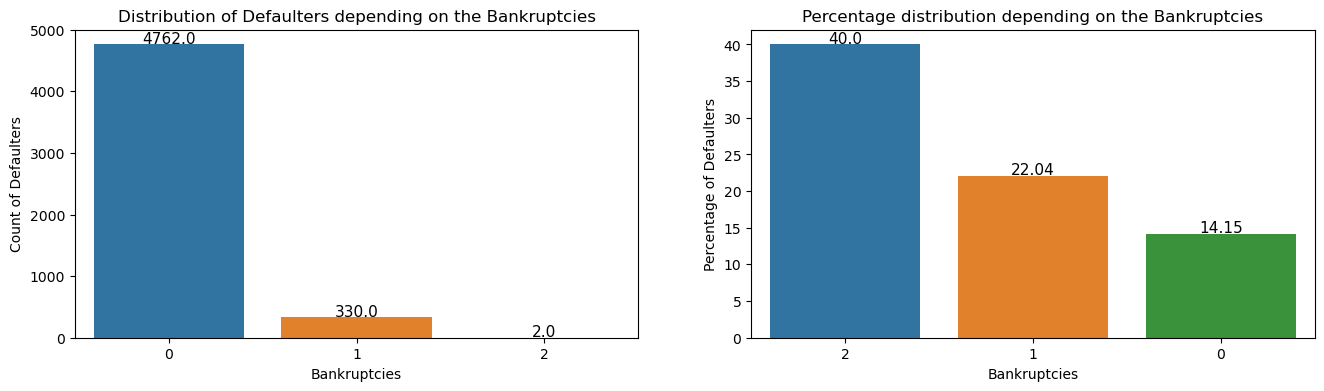

In [113]:
cat_twin_plot(df_loan_default, df_loan_prb, 'pub_rec_bankruptcies', 'Bankruptcies', 'Percent')

In [114]:
# Observations:
# 1. For the bankruptcies, the most number of defaulters fall under the category of '0' and the least under '2'.
# 2. Looking at the proportion, the highest is for the category '2' and the lowest is for '0'.
# 3. There is reverse correlation between the proportion and the actual number of defaulters.
# 4. Even though proportion is high for the category '0', the number of defaulters is very low. 

#### Analysis based on the Address State

In [116]:
# Calculating distribution percentage based on State
df_loan_address = df_loan_fin.groupby(['loan_status','addr_state'])['loan_status'].count().reset_index(name='Count').sort_values(['loan_status','addr_state'], ascending=False)
df_address = df_loan_address.groupby(['addr_state'])['Count'].sum().reset_index(name='Total')
df_loan_address = df_loan_address.join(df_address.set_index('addr_state'), on='addr_state')
df_loan_address['Percent'] = (df_loan_address['Count']/df_loan_address['Total']*100).round(2)


In [117]:
# Creating pivot table for displaying the percentage difference based on 'addr_state'
pd.pivot_table(df_loan_address, values =['Percent', 'Count'], index =['addr_state'], 
                         columns =['loan_status'], aggfunc = np.sum).sort_values(by=[('Percent','Charged Off')],ascending=False)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\1332815796.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_address, values =['Percent', 'Count'], index =['addr_state'],


Count                Percent           
loan_status Charged Off Fully Paid Charged Off Fully Paid
addr_state                                               
NV                 96.0      346.0       21.72      78.28
TN                  2.0        8.0       20.00      80.00
AK                 13.0       55.0       19.12      80.88
SD                 11.0       49.0       18.33      81.67
HI                 28.0      128.0       17.95      82.05
FL                447.0     2085.0       17.65      82.35
NM                 29.0      139.0       17.26      82.74
OR                 68.0      340.0       16.67      83.33
MO                102.0      519.0       16.43      83.57
NJ                261.0     1366.0       16.04      83.96
GA                198.0     1039.0       16.01      83.99
CA               1005.0     5327.0       15.87      84.13
MD                146.0      787.0       15.65      84.35
NH                 23.0      125.0       15.54      84.46
WA                113.0      617.0       15.48      84.52
NC                102.0      565.0       15.29      84.71
UT                 35.0      196.0       15.15      84.85
KY                 45.0      253.0       15.10      84.90
SC                 62.0      364.0       14.55      85.45
WI                 58.0      341.0       14.54      85.46
MI                 93.0      551.0       14.44      85.56
AZ                108.0      653.0       14.19      85.81
OK                 39.0      237.0       14.13      85.87
MN                 77.0      484.0       13.73      86.27
IL                187.0     1176.0       13.72      86.28
VA                168.0     1087.0       13.39      86.61
NY                438.0     2862.0       13.27      86.73
RI                 24.0      159.0       13.11      86.89
CT                 85.0      565.0       13.08      86.92
LA                 50.0      334.0       13.02      86.98
MT                 10.0       67.0       12.99      87.01
WV                 21.0      141.0       12.96      87.04
OH                142.0      960.0       12.89      87.11
AL                 49.0      351.0       12.25      87.75
CO                 85.0      614.0       12.16      87.84
MA                138.0     1015.0       11.97      88.03
PA                165.0     1220.0       11.91      88.09
TX                285.0     2109.0       11.90      88.10
VT                  6.0       45.0       11.76      88.24
DE                 12.0       92.0       11.54      88.46
AR                 25.0      193.0       11.47      88.53
KS                 25.0      208.0       10.73      89.27
MS                  2.0       17.0       10.53      89.47
DC                 13.0      182.0        6.67      93.33
WY                  3.0       72.0        4.00      96.00
IA                  NaN        1.0         NaN     100.00
ID                  NaN        4.0         NaN     100.00
IN                  NaN        1.0         NaN     100.00
NE                  NaN        1.0         NaN     100.00

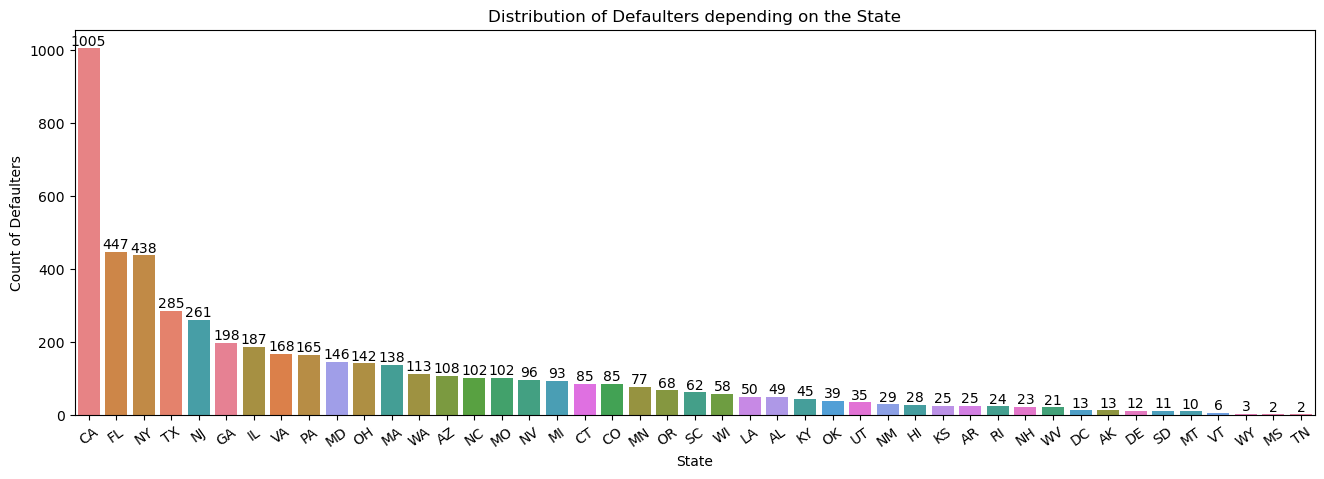

In [118]:
# Count of Defaulters based on State
plt.figure(figsize=(16, 5))
ax = sns.countplot(x = 'addr_state', hue = "addr_state", data = df_loan_default, order = df_loan_default['addr_state'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Defaulters depending on the State')
plt.xlabel('State')
plt.ylabel('Count of Defaulters')
plt.xticks(rotation=35)
plt.show()

In [119]:
# Observations:
# 1. For the state, the most number of defaulters fall under the state of 'CA' and the least under 'TN' and 'MS'. 

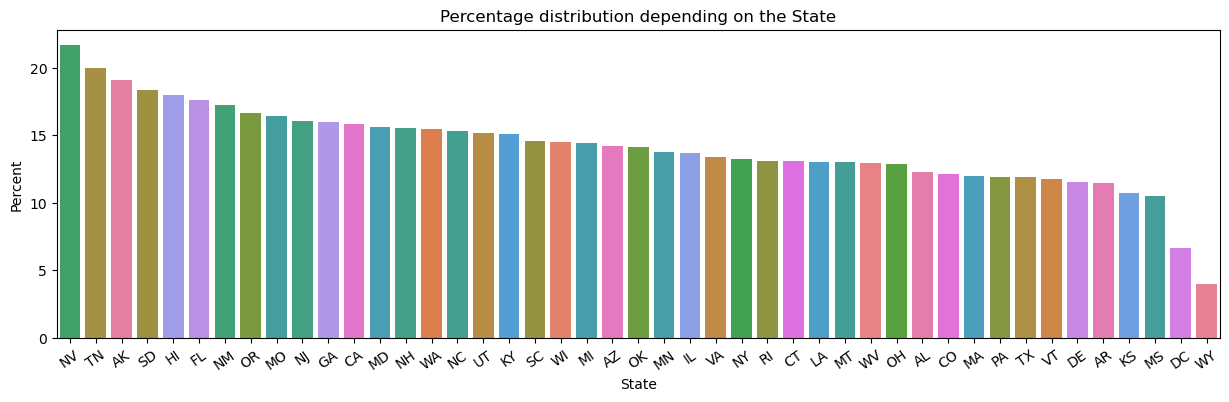

In [120]:
# Percentage distribution depending on the State
plt.figure(figsize=(15, 4))
ax = sns.barplot(x ='addr_state', y = 'Percent', hue = "addr_state", 
                 data = df_loan_address[df_loan_address['loan_status']=='Charged Off'], 
                 order = df_loan_address[df_loan_address['loan_status']=='Charged Off'].sort_values('Percent',ascending = False).addr_state)
plt.xlabel('State')
plt.ylabel('Percent')
plt.title('Percentage distribution depending on the State')
plt.xticks(rotation=35)
plt.show()

In [121]:
# Observations:
# 1. Looking at the proportion, the highest is for the state of 'NV' and the lowest is for 'WY'.
# 2. Even though proportion is high for the state 'TN', the number of defaulters is very low.
# 3. The number of defaulters is high for the state of 'CA', but the percentage is almost average when compared to the others

#### Analysis based on Home Ownership and Purpose

In [123]:
df_loan_hp = df_loan_fin.groupby(['home_ownership','purpose','loan_status'])['loan_status'].count().reset_index(name='Count').sort_values(['home_ownership','purpose','loan_status'], ascending=False)
df_hp = df_loan_hp.groupby(['home_ownership','purpose'])['Count'].sum().reset_index(name='Total')
df_loan_hp = df_loan_hp.join(df_hp.set_index(['home_ownership','purpose']), on=['home_ownership','purpose'])
df_loan_hp['Percent'] = (df_loan_hp['Count']/df_loan_hp['Total']*100).round(2)


In [124]:
# Creating pivot table for displaying the percentage difference based on 'addr_state'
pd.pivot_table(df_loan_hp, values =['Percent', 'Count'], index =['home_ownership','purpose'], 
                         columns =['loan_status'], aggfunc = np.sum).sort_values(by=[('Percent','Charged Off')],ascending=False)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\828851643.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_hp, values =['Percent', 'Count'], index =['home_ownership','purpose'],


Count                Percent  \
loan_status                       Charged Off Fully Paid Charged Off   
home_ownership purpose                                                 
OTHER          moving                     1.0        NaN      100.00   
               car                        1.0        1.0       50.00   
               small_business             4.0        6.0       40.00   
OWN            small_business            28.0       62.0       31.11   
RENT           small_business           208.0      469.0       30.72   
OWN            educational                4.0       12.0       25.00   
MORTGAGE       small_business           185.0      577.0       24.28   
RENT           renewable_energy           8.0       25.0       24.24   
OWN            moving                     5.0       18.0       21.74   
OTHER          home_improvement           1.0        4.0       20.00   
RENT           house                     35.0      146.0       19.34   
               vacation                  35.0      154.0       18.52   
OTHER          credit_card                2.0        9.0       18.18   
RENT           other                    346.0     1567.0       18.09   
               educational               33.0      156.0       17.46   
MORTGAGE       renewable_energy           8.0       39.0       17.02   
OWN            other                     53.0      261.0       16.88   
RENT           medical                   50.0      248.0       16.78   
OWN            medical                    9.0       45.0       16.67   
RENT           moving                    66.0      337.0       16.38   
OTHER          debt_consolidation         6.0       32.0       15.79   
MORTGAGE       debt_consolidation      1057.0     5756.0       15.51   
OWN            vacation                   4.0       22.0       15.38   
OTHER          other                      2.0       11.0       15.38   
MORTGAGE       medical                   39.0      219.0       15.12   
OWN            debt_consolidation       172.0      970.0       15.06   
RENT           debt_consolidation      1312.0     7415.0       15.03   
OWN            renewable_energy           1.0        6.0       14.29   
RENT           home_improvement          33.0      201.0       14.10   
MORTGAGE       house                     16.0       98.0       14.04   
               educational               11.0       69.0       13.75   
OWN            credit_card               31.0      210.0       12.86   
MORTGAGE       other                    155.0     1065.0       12.70   
RENT           car                       74.0      513.0       12.61   
OWN            home_improvement          34.0      239.0       12.45   
RENT           major_purchase           114.0      828.0       12.10   
OWN            house                      3.0       22.0       12.00   
MORTGAGE       home_improvement         229.0     1717.0       11.77   
               wedding                   30.0      227.0       11.67   
OWN            car                       14.0      115.0       10.85   
               major_purchase            22.0      187.0       10.53   
MORTGAGE       credit_card              207.0     1764.0       10.50   
RENT           credit_card              244.0     2118.0       10.33   
               wedding                   55.0      504.0        9.84   
MORTGAGE       car                       62.0      611.0        9.21   
               vacation                  10.0      108.0        8.47   
               major_purchase            66.0      743.0        8.16   
               moving                     7.0       84.0        7.69   
OWN            wedding                    2.0       47.0        4.08   
OTHER          educational                NaN        3.0         NaN   
               house                      NaN        1.0         NaN   
               major_purchase             NaN        5.0         NaN   
               medical                    NaN        3.0         NaN   
        

#### Analysis based on Employment period and Purpose

In [126]:
df_loan_ep = df_loan_fin.groupby(['emp_length','purpose','loan_status'])['loan_status'].count().reset_index(name='Count').sort_values(['emp_length','purpose','loan_status'], ascending=False)
df_ep = df_loan_ep.groupby(['emp_length','purpose'])['Count'].sum().reset_index(name='Total')
df_loan_ep = df_loan_ep.join(df_ep.set_index(['emp_length','purpose']), on=['emp_length','purpose'])
df_loan_ep['Percent'] = (df_loan_ep['Count']/df_loan_ep['Total']*100).round(2)


In [127]:
# Creating pivot table for displaying the percentage difference based on 'addr_state'
pd.pivot_table(df_loan_ep, values =['Percent', 'Count'], index =['emp_length','purpose'], 
                         columns =['loan_status'], aggfunc = np.sum).sort_values(by=['purpose',('Percent','Charged Off')],ascending=False)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\839527190.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_ep, values =['Percent', 'Count'], index =['emp_length','purpose'],


Count                Percent           
loan_status                   Charged Off Fully Paid Charged Off Fully Paid
emp_length purpose                                                         
10+ years  wedding                   16.0       81.0       16.49      83.51
5 years    wedding                   15.0       85.0       15.00      85.00
2 years    wedding                   13.0      105.0       11.02      88.98
3 years    wedding                   13.0      120.0        9.77      90.23
8 years    wedding                    2.0       19.0        9.52      90.48
6 years    wedding                    5.0       48.0        9.43      90.57
< 1 year   wedding                   11.0      115.0        8.73      91.27
4 years    wedding                    6.0       78.0        7.14      92.86
7 years    wedding                    2.0       33.0        5.71      94.29
9 years    wedding                    1.0       17.0        5.56      94.44
1 year     wedding                    3.0       78.0        3.70      96.30
7 years    vacation                   5.0        8.0       38.46      61.54
< 1 year   vacation                   8.0       22.0       26.67      73.33
8 years    vacation                   2.0        8.0       20.00      80.00
9 years    vacation                   3.0       12.0       20.00      80.00
6 years    vacation                   3.0       15.0       16.67      83.33
10+ years  vacation                  13.0       79.0       14.13      85.87
4 years    vacation                   5.0       32.0       13.51      86.49
5 years    vacation                   4.0       32.0       11.11      88.89
2 years    vacation                   3.0       29.0        9.38      90.62
3 years    vacation                   3.0       32.0        8.57      91.43
1 year     vacation                   NaN       15.0         NaN     100.00
8 years    small_business            18.0       34.0       34.62      65.38
4 years    small_business            47.0       99.0       32.19      67.81
10+ years  small_business            93.0      209.0       30.79      69.21
3 years    small_business            53.0      124.0       29.94      70.06
1 year     small_business            48.0      116.0       29.27      70.73
5 years    small_business            33.0       88.0       27.27      72.73
< 1 year   small_business            53.0      153.0       25.73      74.27
6 years    small_business            19.0       57.0       25.00      75.00
2 years    small_business            40.0      140.0       22.22      77.78
7 years    small_business            16.0       60.0       21.05      78.95
9 years    small_business             5.0       34.0       12.82      87.18
8 years    renewable_energy           1.0        1.0       50.00      50.00
4 years    renewable_energy           3.0        4.0       42.86      57.14
3 years    renewable_energy           4.0        6.0       40.00      60.00
1 year     renewable_energy           2.0        5.0       28.57      71.43
5 years    renewable_energy           1.0        4.0       20.00      80.00
7 years    renewable_energy           2.0        9.0       18.18      81.82
2 years    renewable_energy           1.0        5.0       16.67      83.33
10+ years  renewable_energy           3.0       21.0       12.50      87.50
6 years    renewable_energy           NaN        6.0         NaN     100.00
9 years    renewable_energy           NaN        4.0         NaN     100.00
< 1 year   renewable_energy           NaN        5.0         NaN     100.00
2 years    other                     73.0      342.0       17.59      82.41
3 years    other                     61.0      291.0       17.33      82.67
7 years    other                     26.0      124.0       17.33      82.67
10+ years  other                    131.0      627.0       17.28      82.72
6 years    other                     28.0      140.0       16.67      83.33
4 years    other                     47.0      255.0       15.56      84.44
< 1 year

#### Analysis based on Employment period and Home Ownership

In [129]:
df_loan_eh = df_loan_fin.groupby(['emp_length','home_ownership','loan_status'])['loan_status'].count().reset_index(name='Count').sort_values(['emp_length','home_ownership','loan_status'], ascending=False)
df_eh = df_loan_eh.groupby(['emp_length','home_ownership'])['Count'].sum().reset_index(name='Total')
df_loan_eh = df_loan_eh.join(df_eh.set_index(['emp_length','home_ownership']), on=['emp_length','home_ownership'])
df_loan_eh['Percent'] = (df_loan_eh['Count']/df_loan_eh['Total']*100).round(2)


In [130]:
# Creating pivot table for displaying the percentage difference based on 'addr_state'
pd.pivot_table(df_loan_eh, values =['Percent', 'Count'], index =['emp_length','home_ownership'], 
                         columns =['loan_status'], aggfunc = np.sum).sort_values(by=['home_ownership',('Percent','Charged Off')],ascending=False)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\2884702379.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_eh, values =['Percent', 'Count'], index =['emp_length','home_ownership'],


Count                Percent           
loan_status               Charged Off Fully Paid Charged Off Fully Paid
emp_length home_ownership                                              
10+ years  RENT                 447.0     1886.0       19.16      80.84
7 years    RENT                 117.0      576.0       16.88      83.12
8 years    RENT                  83.0      445.0       15.72      84.28
6 years    RENT                 144.0      774.0       15.69      84.31
4 years    RENT                 247.0     1429.0       14.74      85.26
1 year     RENT                 276.0     1617.0       14.58      85.42
5 years    RENT                 215.0     1264.0       14.54      85.46
9 years    RENT                  63.0      379.0       14.25      85.75
3 years    RENT                 301.0     1828.0       14.14      85.86
< 1 year   RENT                 386.0     2345.0       14.13      85.87
2 years    RENT                 334.0     2138.0       13.51      86.49
6 years    OWN                   26.0      124.0       17.33      82.67
7 years    OWN                   22.0      111.0       16.54      83.46
9 years    OWN                   14.0       72.0       16.28      83.72
3 years    OWN                   38.0      200.0       15.97      84.03
2 years    OWN                   43.0      227.0       15.93      84.07
5 years    OWN                   35.0      186.0       15.84      84.16
< 1 year   OWN                   47.0      264.0       15.11      84.89
10+ years  OWN                   93.0      567.0       14.09      85.91
1 year     OWN                   27.0      172.0       13.57      86.43
8 years    OWN                   13.0       95.0       12.04      87.96
4 years    OWN                   24.0      198.0       10.81      89.19
3 years    OTHER                  3.0        6.0       33.33      66.67
7 years    OTHER                  1.0        2.0       33.33      66.67
1 year     OTHER                  4.0       11.0       26.67      73.33
10+ years  OTHER                  4.0       13.0       23.53      76.47
2 years    OTHER                  2.0        7.0       22.22      77.78
5 years    OTHER                  1.0        4.0       20.00      80.00
< 1 year   OTHER                  2.0       18.0       10.00      90.00
4 years    OTHER                  NaN        7.0         NaN     100.00
6 years    OTHER                  NaN        4.0         NaN     100.00
8 years    OTHER                  NaN        4.0         NaN     100.00
1 year     MORTGAGE             129.0      732.0       14.98      85.02
10+ years  MORTGAGE             706.0     4106.0       14.67      85.33
5 years    MORTGAGE             186.0     1133.0       14.10      85.90
< 1 year   MORTGAGE             157.0      973.0       13.89      86.11
8 years    MORTGAGE              95.0      590.0       13.87      86.13
3 years    MORTGAGE             189.0     1217.0       13.44      86.56
7 years    MORTGAGE             107.0      689.0       13.44      86.56
4 years    MORTGAGE             162.0     1103.0       12.81      87.19
6 years    MORTGAGE             121.0      857.0       12.37      87.63
2 years    MORTGAGE             158.0     1133.0       12.24      87.76
9 years    MORTGAGE              72.0      544.0       11.69      88.31

#### Analysis based on Year Issued and Purpose

In [132]:
df_loan_yp = df_loan_fin.groupby(['issue_year','purpose','loan_status'])['loan_status'].count().reset_index(name='Count').sort_values(['issue_year','purpose','loan_status'], ascending=False)
df_yp = df_loan_yp.groupby(['issue_year','purpose'])['Count'].sum().reset_index(name='Total')
df_loan_yp = df_loan_yp.join(df_yp.set_index(['issue_year','purpose']), on=['issue_year','purpose'])
df_loan_yp['Percent'] = (df_loan_yp['Count']/df_loan_yp['Total']*100).round(2)


In [133]:
# Creating pivot table for displaying the percentage difference based on 'addr_state'
pd.pivot_table(df_loan_yp, values =['Percent', 'Count'], index =['issue_year','purpose'], 
                         columns =['loan_status'], aggfunc = np.sum).sort_values(by=['issue_year',('Percent','Charged Off')],ascending=False)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\1458606661.py:2: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_yp, values =['Percent', 'Count'], index =['issue_year','purpose'],


Count                Percent           
loan_status                   Charged Off Fully Paid Charged Off Fully Paid
issue_year purpose                                                         
2011       small_business           249.0      554.0       31.01      68.99
           renewable_energy          10.0       39.0       20.41      79.59
           moving                    51.0      208.0       19.69      80.31
           other                    291.0     1260.0       18.76      81.24
           medical                   57.0      276.0       17.12      82.88
           debt_consolidation      1590.0     7796.0       16.94      83.06
           house                     26.0      147.0       15.03      84.97
           vacation                  27.0      171.0       13.64      86.36
           home_improvement         169.0     1171.0       12.61      87.39
           credit_card              293.0     2225.0       11.64      88.36
           wedding                   51.0      398.0       11.36      88.64
           car                       93.0      735.0       11.23      88.77
           major_purchase            93.0      854.0        9.82      90.18
2010       small_business            97.0      282.0       25.59      74.41
           renewable_energy           7.0       23.0       23.33      76.67
           vacation                  20.0       84.0       19.23      80.77
           house                     16.0       68.0       19.05      80.95
           educational               14.0       75.0       15.73      84.27
           medical                   25.0      158.0       13.66      86.34
           other                    163.0     1043.0       13.52      86.48
           debt_consolidation       658.0     4356.0       13.12      86.88
           moving                    22.0      163.0       11.89      88.11
           home_improvement          83.0      669.0       11.04      88.96
           major_purchase            83.0      676.0       10.94      89.06
           car                       35.0      341.0        9.31      90.69
           credit_card              117.0     1213.0        8.80      91.20
           wedding                   19.0      236.0        7.45      92.55
2009       small_business            66.0      236.0       21.85      78.15
           house                     12.0       44.0       21.43      78.57
           medical                   15.0       64.0       18.99      81.01
           educational               24.0      129.0       15.69      84.31
           other                     78.0      483.0       13.90      86.10
           debt_consolidation       230.0     1686.0       12.00      88.00
           home_improvement          36.0      265.0       11.96      88.04
           car                       18.0      141.0       11.32      88.68
           wedding                   15.0      118.0       11.28      88.72
           moving                     6.0       51.0       10.53      89.47
           major_purchase            20.0      195.0        9.30      90.70
           credit_card               45.0      489.0        8.43      91.57
           vacation                   2.0       23.0        8.00      92.00
           renewable_energy           NaN        5.0         NaN     100.00
2008       small_business            13.0       42.0       23.64      76.36
           educational               10.0       36.0       21.74      78.26
           car                        5.0       23.0       17.86      82.14
           other                     24.0      118.0       16.90      83.10
           debt_consolidation        67.0      331.0       16.83      83.17
           credit_card               29.0      173.0       14.36      85.64
           home_improvement           9.0       56.0       13.85      86.15
           major_purchase             6.0       38.0       13.64      86.36
           wedding                    2.0       27.0        6.90      93.10
        

#### Analysis based on Employment period, Home Ownership and Purpose

In [135]:
df_loan_ehp = df_loan_fin.groupby(['emp_length','home_ownership','purpose','loan_status'])['loan_status'].count().reset_index(name='Count').sort_values(['emp_length','home_ownership','purpose','loan_status'], ascending=False)
df_ehp = df_loan_ehp.groupby(['emp_length','home_ownership','purpose'])['Count'].sum().reset_index(name='Total')
df_loan_ehp = df_loan_ehp.join(df_ehp.set_index(['emp_length','home_ownership','purpose']), on=['emp_length','home_ownership','purpose'])
df_loan_ehp['Percent'] = (df_loan_ehp['Count']/df_loan_ehp['Total']*100).round(2)
df_loan_ehp.head()

,emp_length,home_ownership,purpose,loan_status,Count,Total,Percent
853,< 1 year,RENT,wedding,Fully Paid,88,97,90.72
852,< 1 year,RENT,wedding,Charged Off,9,97,9.28
851,< 1 year,RENT,vacation,Fully Paid,16,19,84.21
850,< 1 year,RENT,vacation,Charged Off,3,19,15.79
849,< 1 year,RENT,small_business,Fully Paid,70,96,72.92


In [136]:
pd.pivot_table(df_loan_ehp, values =['Percent', 'Count'], index =['emp_length','home_ownership','purpose'], 
                         columns =['loan_status'], aggfunc = np.sum).sort_values(by=['purpose',('Percent','Charged Off')],ascending=False)

C:\Users\naray\AppData\Local\Temp\ipykernel_24144\636843386.py:1: FutureWarning: The provided callable <function sum at 0x0000024C90AB9D00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_loan_ehp, values =['Percent', 'Count'], index =['emp_length','home_ownership','purpose'],


Count             \
loan_status                                  Charged Off Fully Paid   
emp_length home_ownership purpose                                     
6 years    OWN            wedding                    1.0        NaN   
5 years    MORTGAGE       wedding                    9.0       28.0   
10+ years  MORTGAGE       wedding                   10.0       40.0   
           RENT           wedding                    6.0       30.0   
8 years    MORTGAGE       wedding                    1.0        5.0   
2 years    MORTGAGE       wedding                    4.0       21.0   
4 years    OWN            wedding                    1.0        6.0   
3 years    RENT           wedding                   12.0       81.0   
7 years    RENT           wedding                    2.0       17.0   
2 years    RENT           wedding                    9.0       78.0   
5 years    RENT           wedding                    6.0       52.0   
9 years    RENT           wedding                    1.0        9.0   
< 1 year   RENT           wedding                    9.0       88.0   
6 years    RENT           wedding                    2.0       20.0   
8 years    RENT           wedding                    1.0       11.0   
< 1 year   MORTGAGE       wedding                    2.0       24.0   
4 years    RENT           wedding                    4.0       53.0   
6 years    MORTGAGE       wedding                    2.0       28.0   
4 years    MORTGAGE       wedding                    1.0       19.0   
1 year     RENT           wedding                    3.0       65.0   
3 years    MORTGAGE       wedding                    1.0       34.0   
1 year     MORTGAGE       wedding                    NaN        6.0   
           OWN            wedding                    NaN        7.0   
10+ years  OWN            wedding                    NaN       11.0   
2 years    OTHER          wedding                    NaN        1.0   
           OWN            wedding                    NaN        5.0   
3 years    OWN            wedding                    NaN        5.0   
5 years    OWN            wedding                    NaN        5.0   
7 years    MORTGAGE       wedding                    NaN       15.0   
           OWN            wedding                    NaN        1.0   
8 years    OWN            wedding                    NaN        3.0   
9 years    MORTGAGE       wedding                    NaN        7.0   
           OWN            wedding                    NaN        1.0   
< 1 year   OWN            wedding                    NaN        3.0   
7 years    RENT           vacation                   4.0        4.0   
< 1 year   MORTGAGE       vacation                   4.0        4.0   
8 years    RENT           vacation                   2.0        3.0   
9 years    RENT           vacation                   3.0        5.0   
7 years    OWN            vacation                   1.0        2.0   
< 1 year   OWN            vacation                   1.0        2.0   
10+ years  RENT           vacation                   9.0       27.0   
5 years    OWN            vacation                   1.0        3.0   
6 years    RENT           vacation                   3.0       11.0   
4 years    RENT           vacation                   5.0       19.0   
10+ years  OWN            vacation                   1.0        5.0   
< 1 year   RENT           vacation                   3.0       16.0   
2 years    MORTGAGE       vacation                   1.0        6.0   
3 years    MORTGAGE       vacation                   1.0        7.0   
5 years    RENT           vacation                   2.0       16.0   
2 years    RENT           vacation                   2.0       21.0   
3 years    RENT           vacation                   2.0       23.0   
5 years    MORTGAGE       vacation                   1.0       13.0   
10+ years  MORTGAGE       vacation                   3.0       47.0   
1 year     MORTGAGE       vacation                   NaN        6.0   
    